In [24]:
! pip install libpysal geopandas esda splot

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
jan = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/01-01-2021.csv") 
feb = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/02-01-2021.csv") 
mar = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-01-2021.csv") 
apr = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-01-2021.csv") 
may = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-01-2021.csv") 
jun = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-01-2021.csv") 
jul = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-01-2021.csv") 
aug = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-01-2021.csv") 
sep = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-01-2021.csv") 
oct = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/10-01-2021.csv") 
nov = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/11-01-2021.csv") 
state_code = pd.read_csv('https://raw.githubusercontent.com/sasukewong/dataset/main/state_code.csv')

def CleanData(df):
  df=df.drop(columns=['Recovered','Active','Incident_Rate','Total_Test_Results','People_Hospitalized','UID','ISO3','Testing_Rate','Hospitalization_Rate'])
  a='American Samoa'
  gr='Grand Princess'
  gu='Guam'
  dp='Diamond Princess'
  nmi='Northern Mariana Islands'
  pr='Puerto Rico'
  ri='Rhode Island'
  vi='Virgin Islands'
  ha='Hawaii'
  df=df.drop(df[(df['Province_State'] == a)].index)
  df=df.drop(df[(df['Province_State'] == gr)].index)
  df=df.drop(df[(df['Province_State'] == gu)].index)
  df=df.drop(df[(df['Province_State'] == dp)].index)
  df=df.drop(df[(df['Province_State'] == ha)].index)
  df=df.drop(df[(df['Province_State'] == nmi)].index)
  df=df.drop(df[(df['Province_State'] == pr)].index)
  df=df.drop(df[(df['Province_State'] == ri)].index)
  df=df.drop(df[(df['Province_State'] == vi)].index)
  df['State_Code']=df['Province_State']
  for i in range(len(state_code)):
      df['State_Code'].replace(state_code.loc[i]['state'],
          state_code.loc[i]['Postal Code'], inplace=True)    
  return df

In [26]:
covid=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov],axis=0)
covid=CleanData(covid)
covid['Month']=pd.to_datetime(covid['Last_Update'], format='%Y-%m-%d').dt.month

fig = px.scatter_geo(covid, locations="State_Code",locationmode='USA-states',color='Case_Fatality_Ratio',
                     color_continuous_scale=px.colors.sequential.Agsunset,
                     hover_name="Province_State", size=covid['Case_Fatality_Ratio'],
                     animation_frame="Month",
                     projection="albers usa",title="USA Covid Confirmed Cases")
fig.update_layout(height=600, width=1000)
fig.show()

In [ ]:
jan=CleanData(jan)
feb=CleanData(feb)
mar=CleanData(mar)
apr=CleanData(apr)
may=CleanData(may)
jun=CleanData(jun)
jul=CleanData(jul)
aug=CleanData(aug)
sep=CleanData(sep)
oct=CleanData(oct)
nov=CleanData(nov)

In [ ]:
from libpysal import examples
import libpysal as lp
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

In [ ]:
from libpysal.weights.contiguity import Queen
from splot.libpysal import plot_spatial_weights

In [ ]:
from libpysal.weights.contiguity import Queen
from libpysal import examples
import libpysal
import geopandas as gpd
import pandas as pd
import numpy as np
from giddy.directional import Rose
import matplotlib.pyplot as plt
import esda
from splot.esda import lisa_cluster

from ipywidgets import interact, fixed
import ipywidgets as widgets

%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [ ]:
shp_link = examples.get_path('us48.shp')
df = gpd.read_file(examples.get_path('us48.shp'))

In [ ]:
gg=jan
gg=gg.drop(columns=['Case_Fatality_Ratio'])
gg['Jan_Case_Fatality_Ratio']=jan['Case_Fatality_Ratio']
gg['Feb_Case_Fatality_Ratio']=feb['Case_Fatality_Ratio']
gg['Mar_Case_Fatality_Ratio']=mar['Case_Fatality_Ratio']
gg['Apr_Case_Fatality_Ratio']=apr['Case_Fatality_Ratio']
gg['May_Case_Fatality_Ratio']=may['Case_Fatality_Ratio']
gg['Jun_Case_Fatality_Ratio']=jun['Case_Fatality_Ratio']
gg['Jul_Case_Fatality_Ratio']=jul['Case_Fatality_Ratio']
gg['Aug_Case_Fatality_Ratio']=aug['Case_Fatality_Ratio']
gg['Sep_Case_Fatality_Ratio']=sep['Case_Fatality_Ratio']
gg['Oct_Case_Fatality_Ratio']=oct['Case_Fatality_Ratio']
gg['Nov_Case_Fatality_Ratio']=nov['Case_Fatality_Ratio']
gg

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,FIPS,State_Code,Jan_Case_Fatality_Ratio,Feb_Case_Fatality_Ratio,Mar_Case_Fatality_Ratio,Apr_Case_Fatality_Ratio,May_Case_Fatality_Ratio,Jun_Case_Fatality_Ratio,Jul_Case_Fatality_Ratio,Aug_Case_Fatality_Ratio,Sep_Case_Fatality_Ratio,Oct_Case_Fatality_Ratio,Nov_Case_Fatality_Ratio
0,Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,1.0,AL,1.332068,1.668186,2.011264,2.045686,2.065647,2.050566,2.060318,1.963892,1.744840,1.802911,1.871161
1,Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,47019,206,2.0,AK,0.438428,0.481096,0.511535,0.495339,0.509186,0.524751,0.528937,0.515327,0.501427,0.499555,0.522130
3,Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,4.0,AZ,1.700087,1.721982,1.953851,2.015811,2.007710,1.999877,2.003581,1.963442,1.854400,1.826335,1.806591
4,Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,5.0,AR,1.617402,1.650961,1.627862,1.704733,1.708794,1.708596,1.687876,1.585075,1.529024,1.553124,1.633187
5,California,US,2021-01-02 05:30:44,36.1162,-119.6816,2437211,26168,6.0,CA,1.125160,1.238599,1.468876,1.618234,1.652545,1.668726,1.668585,1.624147,1.506587,1.463793,1.462046
6,Colorado,US,2021-01-02 05:30:44,39.0598,-105.3111,337161,4873,8.0,CO,1.445304,1.420545,1.384705,1.319215,1.228930,1.210307,1.217579,1.207654,1.156985,1.127514,1.104225
7,Connecticut,US,2021-01-02 05:30:44,41.5978,-72.7554,185708,5995,9.0,CT,3.228186,2.803264,2.707111,2.528259,2.386855,2.371944,2.369579,2.340441,2.236051,2.211903,2.172948
8,Delaware,US,2021-01-02 05:30:44,39.3185,-75.5071,58064,1065,10.0,DE,1.601681,1.402637,1.632981,1.637811,1.554181,1.525337,1.543227,1.643018,1.570145,1.462586,1.448091
10,District of Columbia,US,2021-01-02 05:30:44,38.8974,-77.0268,29252,788,11.0,DC,2.693833,2.475141,2.504670,2.387137,2.316708,2.314286,2.311495,2.279852,2.089257,1.917464,1.847371
11,Florida,US,2021-01-02 05:30:44,27.7663,-81.6868,1323315,21673,12.0,FL,1.637781,1.545069,1.622202,1.622359,1.573917,1.584567,1.596811,1.483505,1.364431,1.527552,1.616717


In [ ]:
gdf = df.merge(gg,left_on='STATE_NAME',right_on='Province_State')

In [ ]:
gdf

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,FIPS,State_Code,Jan_Case_Fatality_Ratio,Feb_Case_Fatality_Ratio,Mar_Case_Fatality_Ratio,Apr_Case_Fatality_Ratio,May_Case_Fatality_Ratio,Jun_Case_Fatality_Ratio,Jul_Case_Fatality_Ratio,Aug_Case_Fatality_Ratio,Sep_Case_Fatality_Ratio,Oct_Case_Fatality_Ratio,Nov_Case_Fatality_Ratio
0,20.750,34.956,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",Washington,US,2021-01-02 05:30:44,47.4009,-121.4905,246752,3461,53.0,WA,1.402623,1.378078,1.458434,1.438640,1.358754,1.324762,1.313508,1.294084,1.165747,1.174895,1.185989
1,45.132,34.527,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",Montana,US,2021-01-02 05:30:44,46.9219,-110.4544,81555,961,30.0,MT,1.178346,1.311789,1.356959,1.373120,1.444235,1.442187,1.463702,1.464345,1.407516,1.326930,1.336904
2,9.571,18.899,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",Maine,US,2021-01-02 05:30:44,44.6939,-69.3819,24902,352,23.0,ME,1.413541,1.504691,1.570493,1.464913,1.280512,1.216473,1.243936,1.277266,1.224276,1.128661,1.120287
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",North Dakota,US,2021-01-02 05:30:44,47.5289,-99.7840,92770,1316,38.0,ND,1.411016,1.481368,1.477186,1.450159,1.416773,1.403212,1.408082,1.405878,1.350515,1.238630,1.210359
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",South Dakota,US,2021-01-02 05:30:44,44.2998,-99.4388,99164,1488,46.0,SD,1.500545,1.641509,1.678670,1.642526,1.603620,1.621696,1.636028,1.633060,1.559054,1.474490,1.446880
5,27.966,21.987,6,6,Wyoming,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5...",Wyoming,US,2021-01-02 05:30:44,42.7560,-107.3025,44409,438,56.0,WY,0.986287,1.144899,1.231848,1.241377,1.215988,1.192566,1.198018,1.191518,1.128843,1.092477,1.132964
6,16.477,21.891,7,7,Wisconsin,55,E N Cen,WI,"MULTIPOLYGON (((-87.74845 44.96163, -87.83989 ...",Wisconsin,US,2021-01-02 05:30:44,44.2685,-89.6165,522523,5254,55.0,WI,1.005506,1.085473,1.135503,1.150245,1.144721,1.167566,1.200165,1.206348,1.153935,1.093238,1.062844
7,24.391,28.529,8,8,Idaho,16,Mtn,ID,"POLYGON ((-117.02531 43.67915, -117.02280 43.7...",Idaho,US,2021-01-02 05:30:44,44.2405,-114.4788,141077,1436,16.0,ID,1.017884,1.063341,1.088871,1.085148,1.090293,1.086815,1.104111,1.095848,1.065369,1.131223,1.221619
8,2.794,8.450,9,9,Vermont,50,N Eng,VT,"POLYGON ((-73.25851 42.74598, -73.26972 42.747...",Vermont,US,2021-01-02 05:30:44,44.0459,-72.7107,7412,136,50.0,VT,1.834862,1.448316,1.341272,1.162731,1.072421,1.052675,1.052761,1.044638,0.975386,0.939383,0.912246
9,25.577,29.510,10,10,Minnesota,27,W N Cen,MN,"POLYGON ((-91.73022 43.49960, -92.07737 43.499...",Minnesota,US,2021-01-02 05:30:44,45.6945,-93.9002,415302,5382,27.0,MN,1.295924,1.355594,1.350700,1.329967,1.254840,1.250172,1.270464,1.266686,1.214330,1.157403,1.105035


In [ ]:
w = Queen.from_dataframe(gdf)
w.transform = 'r'
y1 = gdf['Jan_Case_Fatality_Ratio'].values
y2 = gdf['Nov_Case_Fatality_Ratio'].values

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e40ff7ad0>)

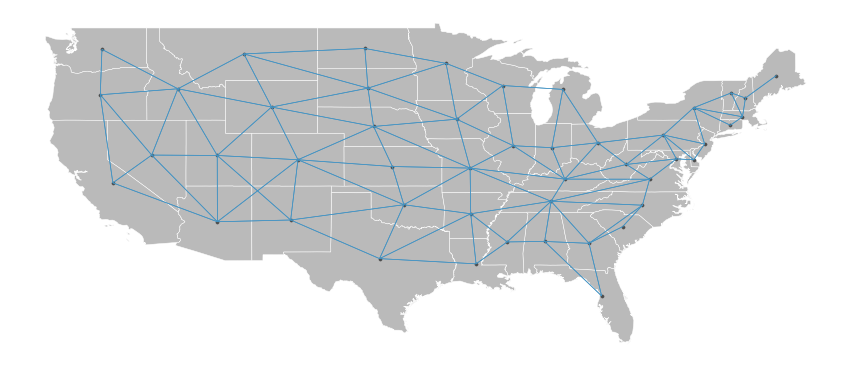

In [ ]:
fig, axs = plt.subplots( figsize=(15,10))
plot_spatial_weights(w, gdf,ax=axs)

In [ ]:
Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)

In [ ]:
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_moran


In [30]:
moran_jan = Moran(gdf['Jan_Case_Fatality_Ratio'].values, w).I
moran_feb = Moran(gdf['Feb_Case_Fatality_Ratio'].values, w).I
moran_mar = Moran(gdf['Mar_Case_Fatality_Ratio'].values, w).I
moran_apr = Moran(gdf['Apr_Case_Fatality_Ratio'].values, w).I
moran_may = Moran(gdf['May_Case_Fatality_Ratio'].values, w).I
moran_jun = Moran(gdf['Jun_Case_Fatality_Ratio'].values, w).I
moran_jul = Moran(gdf['Jul_Case_Fatality_Ratio'].values, w).I
moran_aug = Moran(gdf['Aug_Case_Fatality_Ratio'].values, w).I
moran_sep = Moran(gdf['Sep_Case_Fatality_Ratio'].values, w).I
moran_oct = Moran(gdf['Oct_Case_Fatality_Ratio'].values, w).I
moran_nov = Moran(gdf['Nov_Case_Fatality_Ratio'].values, w).I

In [ ]:
print(
      " Moran's I for Jan.",round(moran_jan,3),'\n',
      "Moran's I for Feb.",round(moran_feb,3),'\n',
      "Moran's I for Mar.",round(moran_mar,3),'\n',
      "Moran's I for Apr.",round(moran_apr,3),'\n',
      "Moran's I for May.",round(moran_may,3),'\n',
      "Moran's I for Jun.",round(moran_jun,3),'\n',
      "Moran's I for Jul.",round(moran_jul,3),'\n',
      "Moran's I for Aug.",round(moran_aug,3),'\n',
      "Moran's I for Sep.",round(moran_sep,3),'\n',
      "Moran's I for Oct.",round(moran_oct,3),'\n',
      "Moran's I for Nov.",round(moran_nov,3),'\n',
)

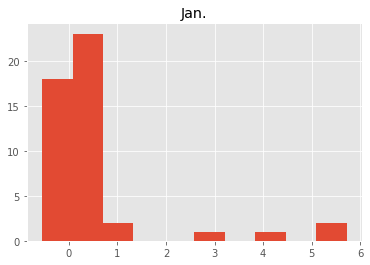

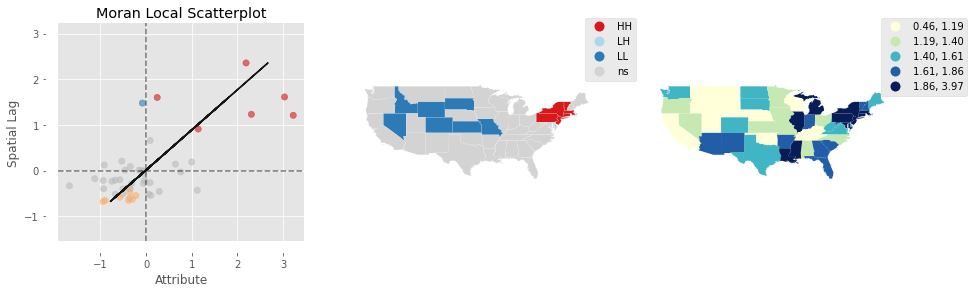

In [88]:
moran_loc = Moran_Local(gdf['Jan_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Jan.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Jan_Case_Fatality_Ratio')
plt.show()

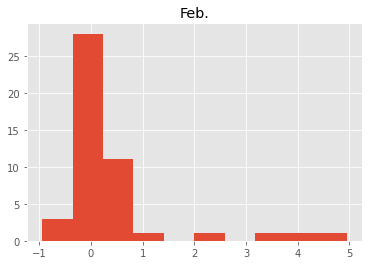

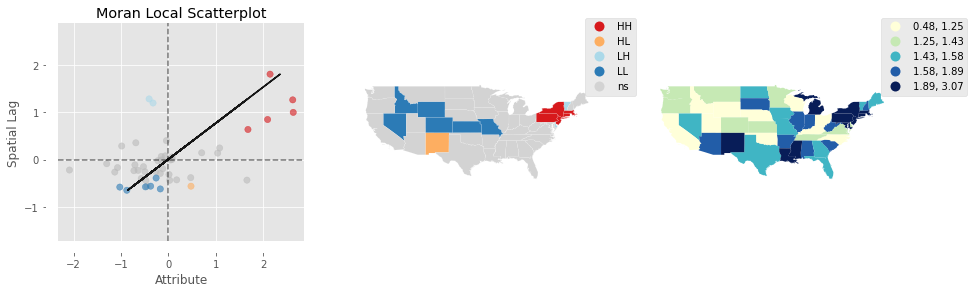

In [87]:
moran_loc = Moran_Local(gdf['Feb_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Feb.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Feb_Case_Fatality_Ratio')
plt.show()

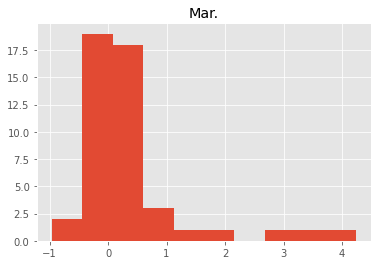

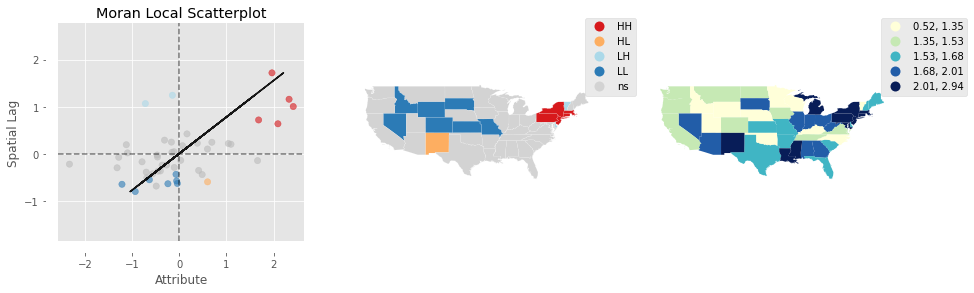

In [85]:
moran_loc = Moran_Local(gdf['Mar_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Mar.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Mar_Case_Fatality_Ratio')
plt.show()

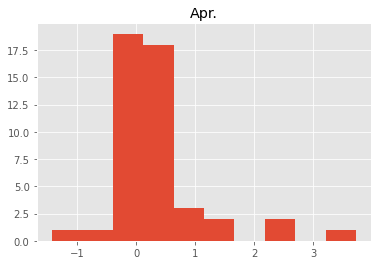

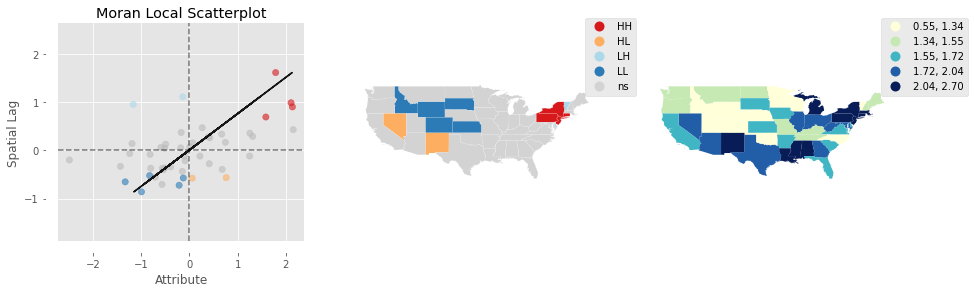

In [84]:
moran_loc = Moran_Local(gdf['Apr_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Apr.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Apr_Case_Fatality_Ratio')
plt.show()

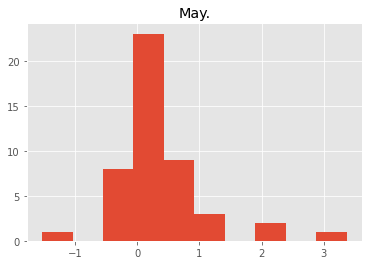

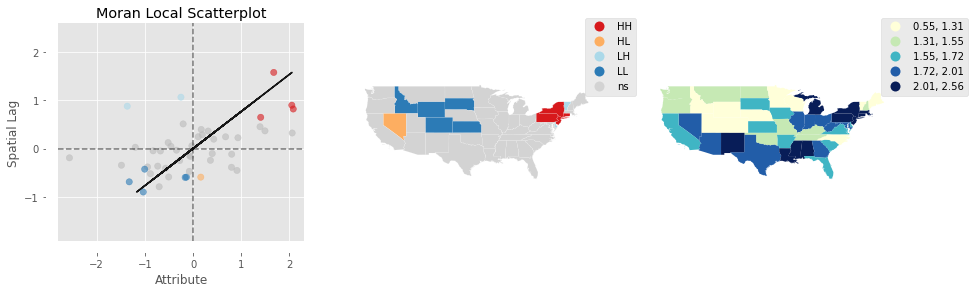

In [82]:
moran_loc = Moran_Local(gdf['May_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("May.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'May_Case_Fatality_Ratio')
plt.show()

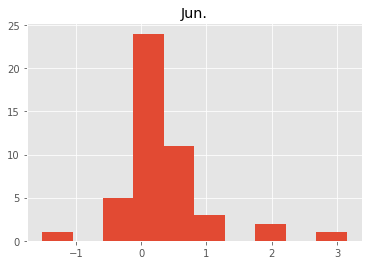

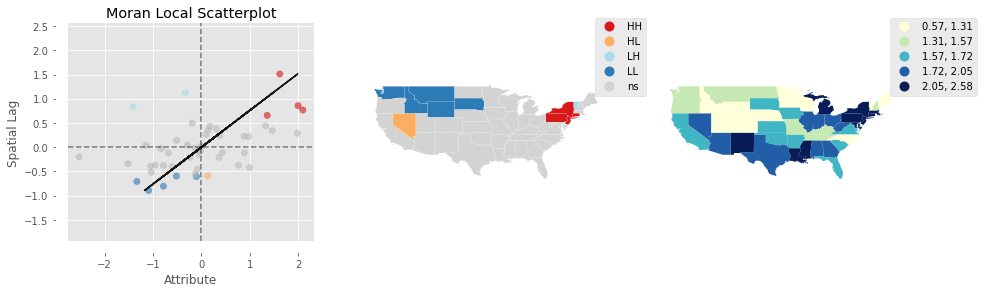

In [80]:
moran_loc = Moran_Local(gdf['Jun_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Jun.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Jun_Case_Fatality_Ratio')
plt.show()

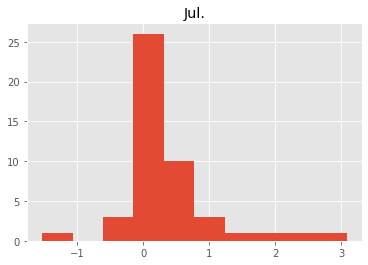

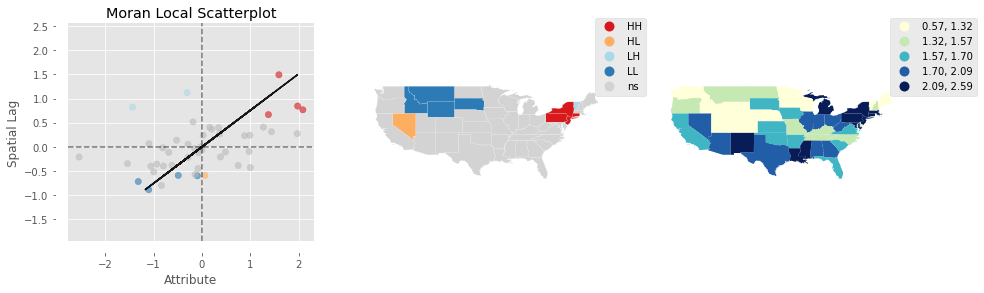

In [78]:
moran_loc = Moran_Local(gdf['Jul_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Jul.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Jul_Case_Fatality_Ratio')
plt.show()

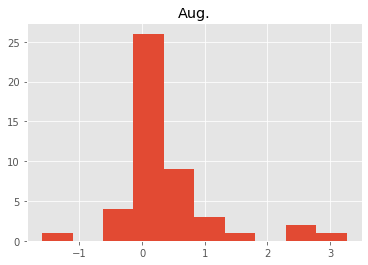

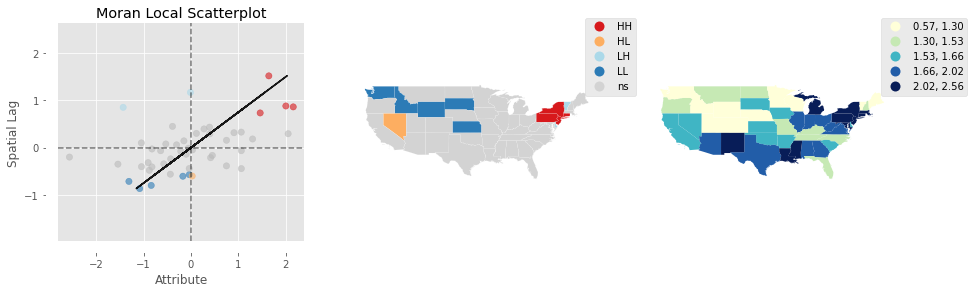

In [77]:
moran_loc = Moran_Local(gdf['Aug_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Aug.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Aug_Case_Fatality_Ratio')
plt.show()

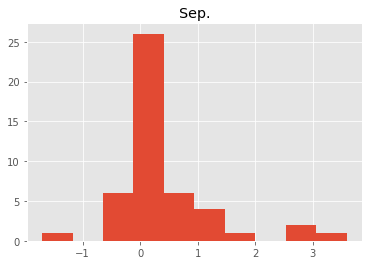

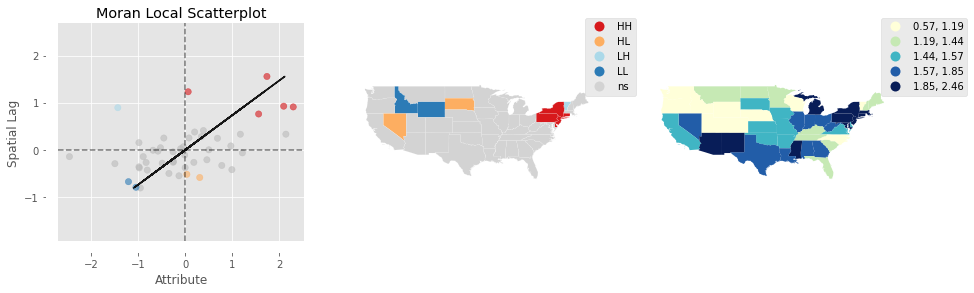

In [76]:
moran_loc = Moran_Local(gdf['Sep_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Sep.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Sep_Case_Fatality_Ratio')
plt.show()

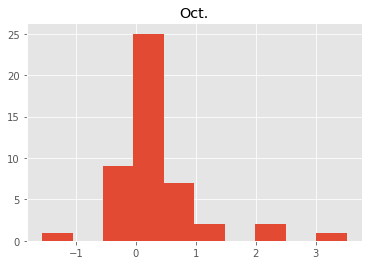

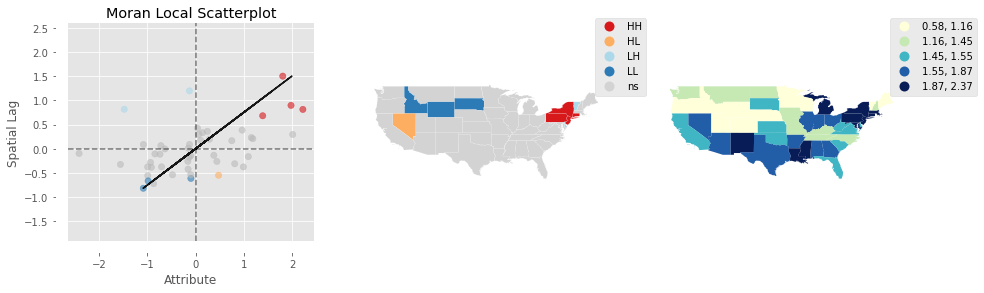

In [74]:
moran_loc = Moran_Local(gdf['Oct_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Oct.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Oct_Case_Fatality_Ratio')
plt.show()

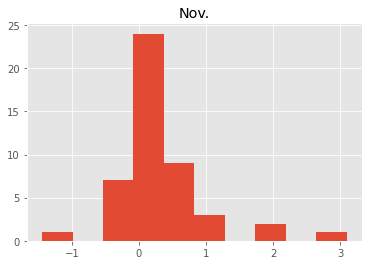

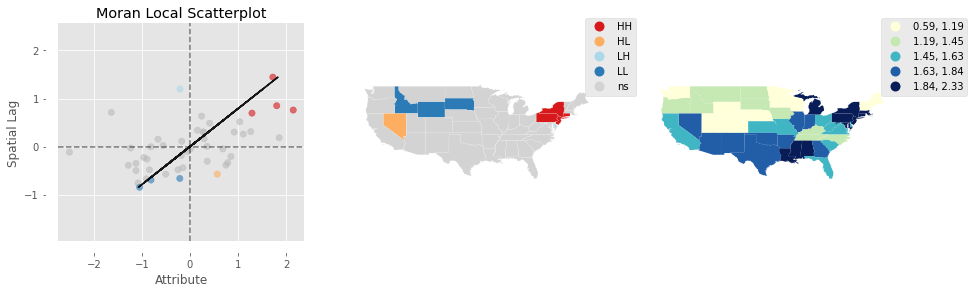

In [72]:
moran_loc = Moran_Local(gdf['Nov_Case_Fatality_Ratio'].values, w)
plt.hist(moran_loc.Is)
plt.title("Nov.")
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Nov_Case_Fatality_Ratio')
plt.show()

In [36]:
moran_loc1 = esda.moran.Moran_Local(y1, w)
moran_loc2 = esda.moran.Moran_Local(y2, w)

In [37]:
from splot.giddy import (dynamic_lisa_heatmap,
                         dynamic_lisa_rose,
                         dynamic_lisa_vectors,
                         dynamic_lisa_composite,
                         dynamic_lisa_composite_explore)
import splot

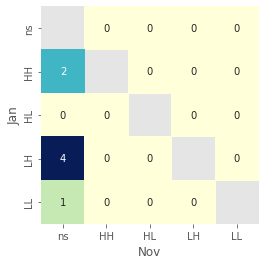

In [38]:
fig, ax = dynamic_lisa_heatmap(rose)
ax.set_ylabel('Jan')
ax.set_xlabel('Nov')
plt.show()

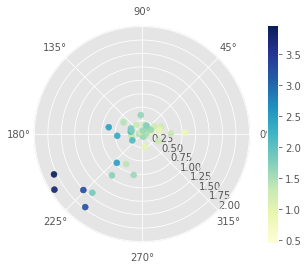

In [39]:
fig, ax = dynamic_lisa_rose(rose, attribute=y1)
plt.show()

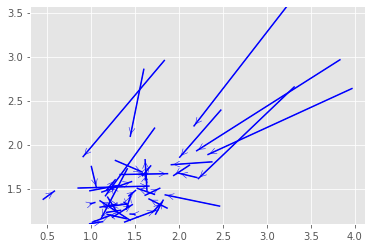

In [40]:
fig, ax = dynamic_lisa_vectors(rose)

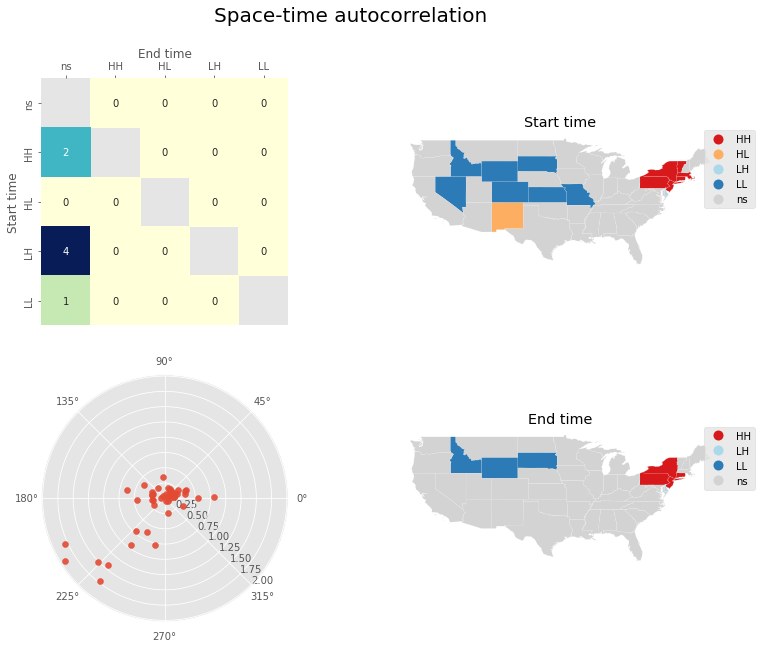

In [41]:
dynamic_lisa_composite(rose, gdf)
plt.show()

In [43]:
dynamic_lisa_composite_explore(rose, gdf, pattern='Case_Fatality_Ratio')
plt.show()

interactive(children=(Dropdown(description='start_time', options={'Jan_Case_Fatality_Ratio': 'Jan_Case_Fatalit…